# Paper Link :- https://arxiv.org/abs/2010.11929

In [1]:
import matplotlib.pyplot as plt 
from data_setup import create_dataloader
from pathlib import Path
from utils import get_class_names


import torch
import torch.nn as nn
from torchvision import transforms

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

/home/samarth/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647378361/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


'cpu'

In [3]:
data_directory = Path("../../Projects/dog_breed_classification/data")
images_directory = data_directory/"Images"
images_directory

PosixPath('../../Projects/dog_breed_classification/data/Images')

In [4]:
class_names,class_to_idx,idx_to_class = get_class_names(images_directory=images_directory)

In [5]:
data_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [6]:
train_dataloader,test_dataloader = create_dataloader(images_directory=images_directory,
                                                     batch_size=32,
                                                     data_transforms=data_transforms,
                                                     num_workers=16)

In [7]:
len(train_dataloader),len(test_dataloader)

(515, 129)

In [8]:
img,label = next(iter(train_dataloader))
img[0].shape

torch.Size([3, 224, 224])

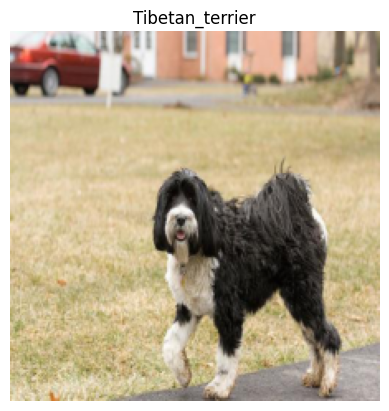

In [9]:
plt.imshow(img[1].permute(1,2,0))
plt.title(idx_to_class[label[1].item()])
plt.axis("off");

In [10]:
height = 224
width = 224 
color_channels = 3
patch_size = 16


number_of_patches = int((height*width)/(patch_size*patch_size))
print(f"No. of patches:- {number_of_patches}")

No. of patches:- 196


In [11]:
embedding_layer_input_shape = (height,width,color_channels)
embedding_layer_output_shape = (number_of_patches, (patch_size**2)*color_channels)
print(f"Input Shape: {embedding_layer_input_shape}\nOutput Shape: {embedding_layer_output_shape}")

Input Shape: (224, 224, 3)
Output Shape: (196, 768)


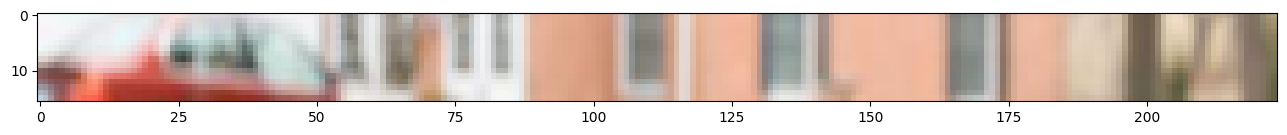

In [12]:
image_permuted = img[1].permute(1,2,0)
plt.figure(figsize=(patch_size,patch_size))
plt.imshow(image_permuted[:patch_size,:,:])


In [13]:
img_size = 224
num_patches_per_row = img_size/patch_size
assert img_size%patch_size == 0

print(num_patches_per_row)

14.0


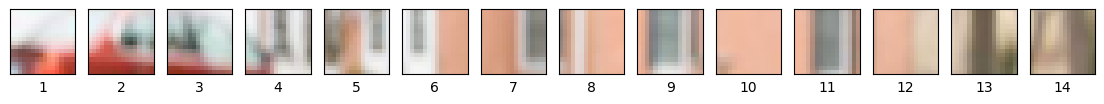

In [14]:
fig,axis = plt.subplots(nrows=1,
                        ncols=img_size//patch_size,
                        figsize=(num_patches_per_row,num_patches_per_row),
                        sharex=True,
                        sharey=True)

for i,patch in enumerate(range(0,img_size,patch_size)):
    
    axis[i].imshow(image_permuted[
        :patch_size,patch:patch+patch_size, :]);
    axis[i].set_xlabel(i+1)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

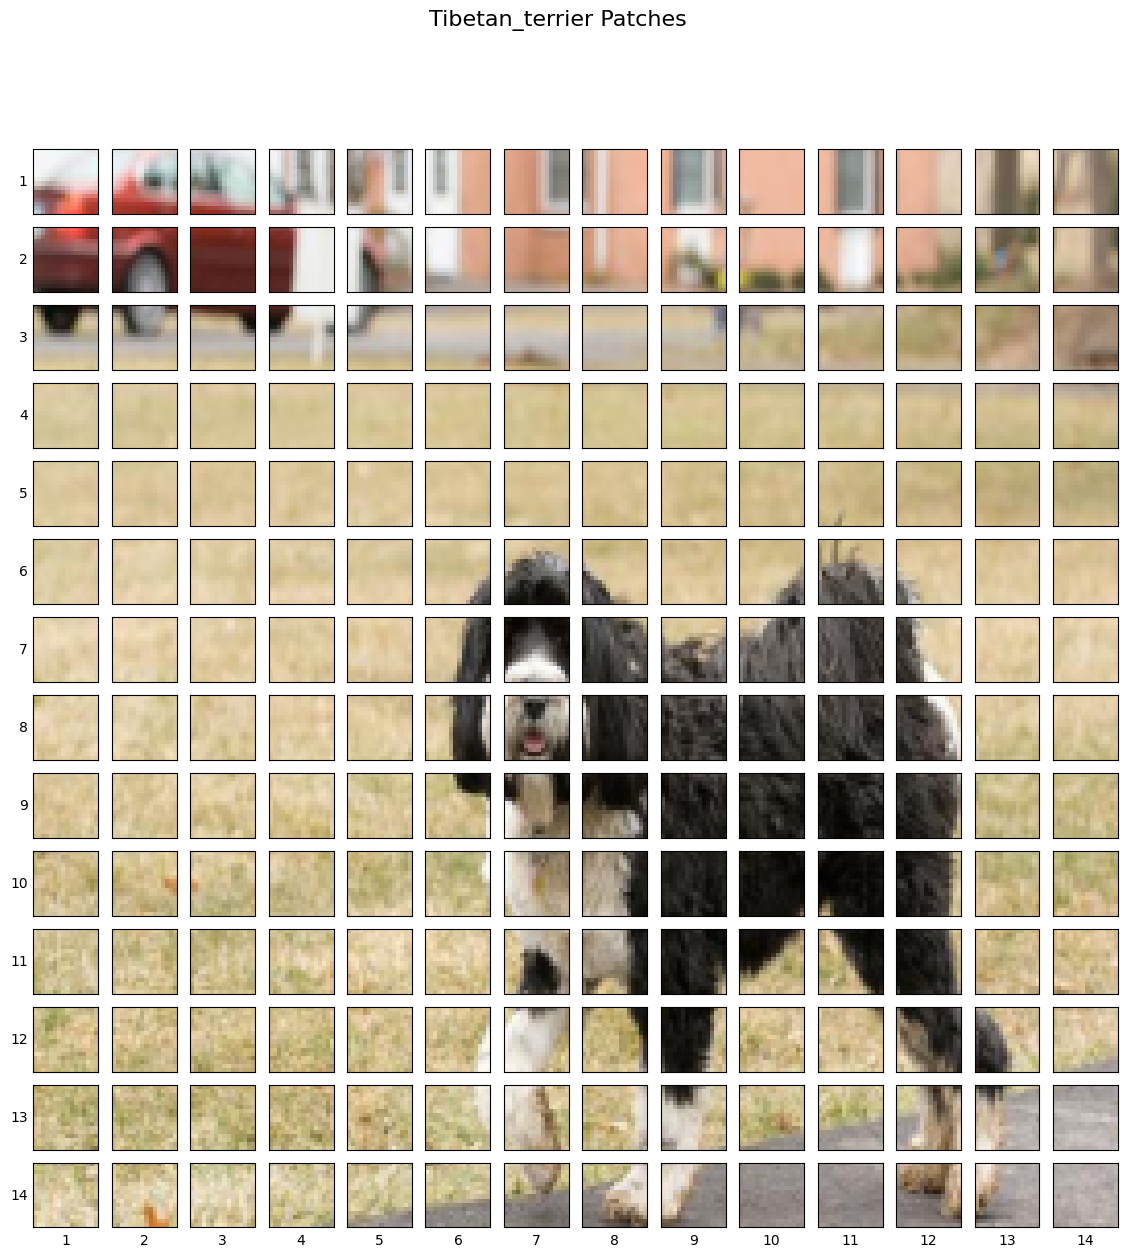

In [15]:
fig,axis = plt.subplots(nrows=img_size//patch_size,
                        ncols = img_size//patch_size,
                        figsize = (num_patches_per_row,num_patches_per_row),
                        sharex=True,
                        sharey=True)

for i,patch_height in enumerate(range(0,img_size,patch_size)):
    for j,patch_width in enumerate(range(0,img_size,patch_size)):
        
        axis[i,j].imshow(image_permuted[patch_height:patch_height+patch_size,patch_width:patch_width+patch_size,:])
        axis[i,j].set_ylabel(i+1,
                             rotation="horizontal",
                             horizontalalignment="right",
                             verticalalignment="center")
        
        axis[i,j].set_xlabel(j+1)
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        axis[i,j].label_outer()
        
        
fig.suptitle(f"{idx_to_class[label[1].item()]} Patches",fontsize=16)
plt.show()



In [16]:
conv2d = nn.Conv2d(in_channels=3,
                   out_channels=768,
                   kernel_size=patch_size,
                   stride=patch_size,
                   padding=0)

In [17]:
image = img[1]

image_out_of_conv = conv2d(image.unsqueeze(dim=0))
image_out_of_conv.shape

torch.Size([1, 768, 14, 14])

tensor([[[-0.4518, -0.3618, -0.1797, -0.3248, -0.2464, -0.3726, -0.2312,
          -0.3756, -0.2361, -0.3145, -0.1825, -0.2959, -0.1437, -0.3435],
         [-0.1400, -0.1101, -0.0650, -0.1101, -0.1452, -0.5670, -0.2494,
          -0.3737, -0.3612, -0.3633, -0.4006, -0.3211, -0.1764, -0.3675],
         [ 0.1123,  0.0034, -0.2302, -0.2482, -0.2181, -0.3139, -0.3515,
          -0.3213, -0.3428, -0.1957, -0.2507, -0.2334, -0.1828, -0.2440],
         [-0.3169, -0.3222, -0.2966, -0.3010, -0.3148, -0.2867, -0.2974,
          -0.2909, -0.2818, -0.2889, -0.2710, -0.2783, -0.2789, -0.2760],
         [-0.3160, -0.2989, -0.2912, -0.3059, -0.3259, -0.3103, -0.3084,
          -0.2940, -0.2646, -0.2920, -0.2487, -0.2495, -0.2642, -0.2223],
         [-0.3149, -0.3260, -0.3091, -0.2998, -0.2962, -0.1903, -0.2398,
          -0.3182, -0.2660, -0.2843, -0.2313, -0.3976, -0.2734, -0.3011],
         [-0.3633, -0.3313, -0.3310, -0.2994, -0.3338, -0.4223,  0.0544,
          -0.0713, -0.3892, -0.2477, -0.1453,

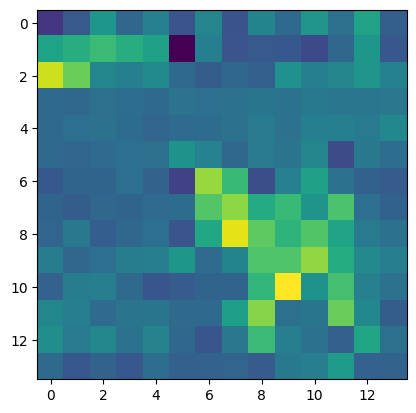

In [18]:
single_feature_map = image_out_of_conv[:,0,:,:]
print(single_feature_map)
plt.imshow(single_feature_map.permute(1,2,0).detach().numpy())

In [19]:
flatten = nn.Flatten(start_dim=2,end_dim=3)
image_out_of_conv_flatten = flatten(image_out_of_conv)
print(image_out_of_conv_flatten.shape)
correct_image_out_of_conv_flatten = image_out_of_conv_flatten.permute(0,2,1)
print(correct_image_out_of_conv_flatten.shape)

torch.Size([1, 768, 196])
torch.Size([1, 196, 768])


In [20]:
image_out_of_conv.shape

torch.Size([1, 768, 14, 14])

(np.float64(-0.5), np.float64(195.5), np.float64(0.5), np.float64(-0.5))

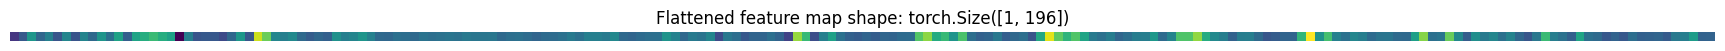

In [21]:
single_flattened_feature_map = correct_image_out_of_conv_flatten[:,:,0]
plt.figure(figsize=(22,22))
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.axis("off")

In [22]:
single_flattened_feature_map

tensor([[-0.4518, -0.3618, -0.1797, -0.3248, -0.2464, -0.3726, -0.2312, -0.3756,
         -0.2361, -0.3145, -0.1825, -0.2959, -0.1437, -0.3435, -0.1400, -0.1101,
         -0.0650, -0.1101, -0.1452, -0.5670, -0.2494, -0.3737, -0.3612, -0.3633,
         -0.4006, -0.3211, -0.1764, -0.3675,  0.1123,  0.0034, -0.2302, -0.2482,
         -0.2181, -0.3139, -0.3515, -0.3213, -0.3428, -0.1957, -0.2507, -0.2334,
         -0.1828, -0.2440, -0.3169, -0.3222, -0.2966, -0.3010, -0.3148, -0.2867,
         -0.2974, -0.2909, -0.2818, -0.2889, -0.2710, -0.2783, -0.2789, -0.2760,
         -0.3160, -0.2989, -0.2912, -0.3059, -0.3259, -0.3103, -0.3084, -0.2940,
         -0.2646, -0.2920, -0.2487, -0.2495, -0.2642, -0.2223, -0.3149, -0.3260,
         -0.3091, -0.2998, -0.2962, -0.1903, -0.2398, -0.3182, -0.2660, -0.2843,
         -0.2313, -0.3976, -0.2734, -0.3011, -0.3633, -0.3313, -0.3310, -0.2994,
         -0.3338, -0.4223,  0.0544, -0.0713, -0.3892, -0.2477, -0.1453, -0.2921,
         -0.3394, -0.3536, -

In [23]:
correct_image_out_of_conv_flatten.shape[2]

768

In [24]:
batch_size = correct_image_out_of_conv_flatten.shape[0]
embedding_dim = correct_image_out_of_conv_flatten.shape[-1]

class_token = nn.Parameter(torch.ones(batch_size,1,embedding_dim),requires_grad=True)

print(class_token[:,:,:10])
print(class_token.shape)

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
torch.Size([1, 1, 768])


In [25]:
patch_embedding_image_with_class_embedding = torch.cat((class_token,correct_image_out_of_conv_flatten),dim=1)

In [26]:
patch_embedding_image_with_class_embedding.shape

torch.Size([1, 197, 768])

In [27]:
patch_embedding_image_with_class_embedding

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.4518, -0.5379,  0.4805,  ...,  0.7380,  0.1989, -0.2217],
         [-0.3618, -0.4857,  0.3530,  ...,  0.7383,  0.0801, -0.2916],
         ...,
         [-0.1601, -0.4169,  0.1137,  ...,  0.4029,  0.1422, -0.1371],
         [-0.3361, -0.3977,  0.3177,  ...,  0.5486,  0.1538, -0.1568],
         [-0.3327, -0.4710,  0.3055,  ...,  0.5342,  0.1913, -0.2291]]],
       grad_fn=<CatBackward0>)

In [28]:
positional_embedding = nn.Parameter(torch.ones(1,number_of_patches+1,embedding_dim),
                                    requires_grad=True)

positional_embedding[:,:10,:10]

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)

In [29]:
positional_embedding.shape

torch.Size([1, 197, 768])

In [30]:
path_and_postion_embedding = patch_embedding_image_with_class_embedding + positional_embedding

In [31]:
path_and_postion_embedding.shape

torch.Size([1, 197, 768])

In [32]:
path_and_postion_embedding

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.5482, 0.4621, 1.4805,  ..., 1.7380, 1.1989, 0.7783],
         [0.6382, 0.5143, 1.3530,  ..., 1.7383, 1.0801, 0.7084],
         ...,
         [0.8399, 0.5831, 1.1137,  ..., 1.4029, 1.1422, 0.8629],
         [0.6639, 0.6023, 1.3177,  ..., 1.5486, 1.1538, 0.8432],
         [0.6673, 0.5290, 1.3055,  ..., 1.5342, 1.1913, 0.7709]]],
       grad_fn=<AddBackward0>)

In [33]:
from multiheadattention_layer import MultiHeadAttentionLayer

multihead_attention_block = MultiHeadAttentionLayer(12,768,0)

patched_image_through_mha = multihead_attention_block(path_and_postion_embedding)
patched_image_through_mha

tensor([[[ 0.2460,  0.5029,  0.1009,  ...,  0.0257,  0.2104, -0.1160],
         [ 0.2400,  0.4962,  0.1005,  ...,  0.0121,  0.2071, -0.1125],
         [ 0.2394,  0.4944,  0.1003,  ...,  0.0119,  0.2077, -0.1146],
         ...,
         [ 0.2415,  0.4925,  0.0974,  ...,  0.0117,  0.2105, -0.1166],
         [ 0.2405,  0.4969,  0.1002,  ...,  0.0131,  0.2083, -0.1152],
         [ 0.2401,  0.4942,  0.0991,  ...,  0.0125,  0.2090, -0.1162]]],
       grad_fn=<TransposeBackward0>)

In [34]:
patched_image_through_mha.shape

torch.Size([1, 197, 768])

In [35]:
from MLP_block import MLPBlock

mlp_block = MLPBlock(768,3072)

patched_image_through_mlp = mlp_block(patched_image_through_mha)
patched_image_through_mlp

torch.Size([1, 197, 768])


tensor([[[0.2266, 0.1758, 0.1111,  ..., 0.2913, 0.4788, 0.3928],
         [0.0000, 0.3048, 0.0475,  ..., 0.4128, 0.3978, 0.2398],
         [0.0923, 0.3113, 0.2599,  ..., 0.4452, 0.3480, 0.3605],
         ...,
         [0.2061, 0.3207, 0.2851,  ..., 0.3655, 0.3468, 0.3699],
         [0.2026, 0.1987, 0.2043,  ..., 0.4347, 0.2914, 0.2620],
         [0.1708, 0.2775, 0.3439,  ..., 0.5059, 0.3534, 0.0000]]],
       grad_fn=<MulBackward0>)

In [36]:
patched_image_through_mlp.shape

torch.Size([1, 197, 768])

In [37]:
from computer_transformer_model import ComputerTransformer
from torchinfo import summary

transformer_encoder_block = ComputerTransformer(embedding_dim=768,
                                                num_heads=12,
                                                mlp_size=3072,
                                                mlp_dropout=0.1,
                                                attention_dropout=0)

summary(model=transformer_encoder_block,
        input_size = (1,197,768),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

torch.Size([1, 197, 768])


Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
ComputerTransformer (ComputerTransformer)               [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiHeadAttentionLayer (mha)                         [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                           [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attention)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                                  [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                           [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Linear (layer1)                                  [1, 197, 768]        [1, 197, 3072]       2,362,368            True
│  